# 1-Parameter of UWB

In [13]:
import pyecharts.options as opts
from pyecharts.charts import Line,Boxplot
from pyecharts.render import make_snapshot
from snapshot_phantomjs  import snapshot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(".\..\..\data\Stop-10.csv", sep=',', header=0, usecols=[0,1,2])
# print(data.describe())
data.head(3)
# data = np.array(data['Speed']).reshape(-1)


,x,y,z
0,0,0,-15
1,0,0,-12
2,0,0,-11


In [34]:
move_data = pd.read_csv(".\..\..\data\Move-10.csv", sep=',', header=0, usecols=[0,1,2])
data.head(3)

,x,y,z
0,0,0,-15
1,0,0,-12
2,0,0,-11


In [60]:
c = (
    Line(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add_xaxis(xaxis_data=list(range(len(data))))  # 添加x轴数据
    .add_yaxis(
        series_name="z",
        y_axis=data['z'].tolist(),
        is_smooth=True,  # 是否平滑显示线条
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5,color='brown'),  # 数据区域缩进样式
        itemstyle_opts=opts.ItemStyleOpts(color="brown"),
        # linestyle_opts = opts.LineStyleOpts(width=2, color='blue'),  # 线条样式
    )
    .add_yaxis(
        series_name="Move-Z",
        y_axis=move_data['z'].tolist(),
        is_smooth=True,  # 是否平滑显示线条
        itemstyle_opts=opts.ItemStyleOpts(color="wheat"),
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5,color='wheat'),  # 数据区域缩进样式
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="UWB Parameter"),  # 设置标题
        legend_opts=opts.LegendOpts(pos_top="top"),  # 设置图例位置
        xaxis_opts=opts.AxisOpts(name="Index", axislabel_opts=opts.LabelOpts(rotate=45)),  # 设置X轴标签和旋转角度
        yaxis_opts=opts.AxisOpts(name="Elevation(°)"),  # 设置Y轴标签

        datazoom_opts=[opts.DataZoomOpts()],  # 添加数据缩放组件
        toolbox_opts = opts.ToolboxOpts(is_show=True,
                                        feature=opts.ToolBoxFeatureOpts(save_as_image=opts.ToolBoxFeatureSaveAsImageOpts(background_color="white",pixel_ratio=3))),  #显示工具箱
        visualmap_opts = opts.VisualMapOpts(is_show=True),  #显示视觉映射组件
        tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="cross"),  # 提示框
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),  # 不显示数据点的文本标签
    )
    # .render("./UWB-parm.html")  # 渲染图表并保存为HTML文件
)

In [61]:
c.render_notebook()

# 2-Mult-Anchor Z

In [37]:
from pyecharts import options as opts
from pyecharts.charts import Line
from pyecharts.commons.utils import JsCode
import math

In [38]:
def calculate_z(h, b, c):
    return ((h**2) + (b**2) - (c**2)) / (2 * h)

h = -30  
c = 35   
b_values = range(0, 70)  
z_b = [calculate_z(h, b, c) for b in b_values]


b = 35 
c_values = range(0, 70)  
z_c = [calculate_z(h, b, c) for c in c_values]  

In [39]:
line_b = Line()
line_b.add_xaxis(xaxis_data=[str(b) for b in b_values])
line_b.add_yaxis(
    series_name="z 值",
    y_axis=z_b,
    label_opts=opts.LabelOpts(is_show=False),
)
line_b.set_global_opts(
    title_opts=opts.TitleOpts(title="Master Anchor Distance Change Effect on z"),
    xaxis_opts=opts.AxisOpts(name = "Master Distance", name_location="right", name_gap=30, type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(name = "Z Value", type_="value", axislabel_opts=opts.LabelOpts(formatter="{value}")),

)

line_c = Line()
line_c.add_xaxis(xaxis_data=[str(c) for c in c_values])
line_c.add_yaxis(
    series_name="z 值",
    y_axis=z_c,
    label_opts=opts.LabelOpts(is_show=False),
)
line_c.set_global_opts(
    title_opts=opts.TitleOpts(title="Slaver 2 Anchor Distance Change Effect on z"),
    xaxis_opts=opts.AxisOpts(name = "Slaver2 Distance", name_location = "right", name_gap=30, type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(name = "Z Value", type_="value", axislabel_opts=opts.LabelOpts(formatter="{value}")),
)



In [40]:
line_b.render_notebook()

- 令Master Anchor所处平面为Z=0，Slaver 2 Anchor 位于Master Anchor 正下方
- 若Master Anchor测距值偏大，则所求Z值偏小
- 若Master Anchor测距值偏小，则所求Z值偏大
- 由于Master Disatnce不可能小于0，在距离较进的区域偏小的情况被天然限制，这个时候距离偏大成为主要问题

In [41]:
line_c.render_notebook()

- 若Slaver 2 Anchor测距值偏大，则所求Z值偏大
- 若Slaver 2 Anchor测距值偏小，则所求Z值偏小
- 由于Slaver 2 Disatnce不可能小于0，在距离较近的区域偏小的情况被天然限制，这个时候距离偏大成为主要问题
- 若两个距离向相同的方向偏离会互相抵消定位误差，若向相反方向偏离误差会叠加，造成的影响较大


# 3-Z误差估计
- △z = (b * △b - c * △c) / h
- 假定△b和△c的误差范围是[-20, 20]. 
- 通过控制h的值，判断不同h的取值下，△z的误差范围
- 有效范围控制在1m,即b和c的理论最大值为112cm，考虑误差:[0,132]

In [119]:
import pyecharts.options as opts
from pyecharts.charts import Line,Boxplot
import numpy as np

h = [30,35,40,45,50]
def calculate_ez(h,b,c,eb,ec):
    return (b * eb - c * ec) / h    # 线性近似
    # return np.sqrt(((b * eb) / h)**2 + ((c * ec) / h)**2)

b = 100
c = 100
eb_values = range(0, 11)
ec_values = range(0, 11)
ez = [calculate_ez(h[0], b, c, eb, ec) for eb in eb_values for ec in ec_values]
print(len(ez))

ez_matrix = [
    [
        calculate_ez(h_val, b, c, eb, ec)
        for eb in eb_values
        for ec in ec_values
    ]
    for h_val in h
]


121


In [120]:
from pyecharts.charts import Scatter
scatter = Scatter()

for i, h_val in enumerate(h):
    data = ez_matrix[i]
    scatter.add_xaxis([f"({eb},{ec})" for eb in eb_values for ec in ec_values])
    scatter.add_yaxis(f"h={h_val}", data, label_opts=opts.LabelOpts(is_show=False))

scatter.set_global_opts(
        title_opts=opts.TitleOpts(title="不同高度误差分布"),  # 设置标题
        legend_opts=opts.LegendOpts(pos_top="top"),  # 设置图例位置
        xaxis_opts=opts.AxisOpts(name="(eb, ec)", type_="category"),
        yaxis_opts=opts.AxisOpts(name="ez"),

        datazoom_opts=[opts.DataZoomOpts()],  # 添加数据缩放组件
        toolbox_opts = opts.ToolboxOpts(is_show=True,
                                        feature=opts.ToolBoxFeatureOpts(save_as_image=opts.ToolBoxFeatureSaveAsImageOpts(background_color="white",pixel_ratio=3))),  #显示工具箱
        # visualmap_opts = opts.VisualMapOpts(is_show=True),  #显示视觉映射组件
        tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="cross"),  # 提示框
    )
# scatter.render("error_on_diff-z.html")
scatter.render_notebook()

In [121]:
x_values = range(0, len(ez))
line_ez = Line()
line_ez.add_xaxis(xaxis_data=[str(x) for x in x_values])
line_ez.add_yaxis(
    series_name="eoz",
    y_axis=ez,
    label_opts=opts.LabelOpts(is_show=False),
)
line_ez.set_global_opts(
        title_opts=opts.TitleOpts(title="error on z"),  # 设置标题
        legend_opts=opts.LegendOpts(pos_top="top"),  # 设置图例位置
        xaxis_opts=opts.AxisOpts(name="Index", axislabel_opts=opts.LabelOpts(rotate=45)),  # 设置X轴标签和旋转角度
        yaxis_opts=opts.AxisOpts(name="eoz"),  # 设置Y轴标签

        datazoom_opts=[opts.DataZoomOpts()],  # 添加数据缩放组件
        toolbox_opts = opts.ToolboxOpts(is_show=True,
                                        feature=opts.ToolBoxFeatureOpts(save_as_image=opts.ToolBoxFeatureSaveAsImageOpts(background_color="white",pixel_ratio=3))),  #显示工具箱
        visualmap_opts = opts.VisualMapOpts(is_show=True),  #显示视觉映射组件
        tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="cross"),  # 提示框
    )

line_ez.render_notebook()

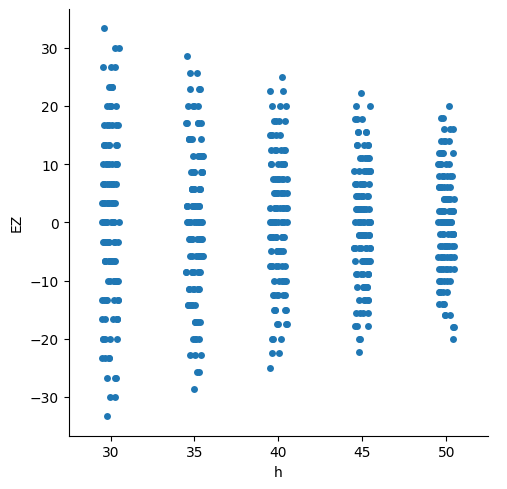

In [110]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = []
for i, h_val in enumerate(h):
    for j, ez_val in enumerate(ez_matrix[i]):
        data.append({'h': h_val, 'ez': ez_val, 'index': j})

df = pd.DataFrame(data)
df.head(3)

g = sns.catplot(x="h", y="ez", data=df)
g.set_axis_labels("h", "EZ")
g.set_titles("{h} h", loc="left")
plt.show()